# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [4]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [7]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [8]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [9]:
# Create a Beautiful Soup Object

response = requests.get(url)

# Create a BeautifulSoup object with the page content and specify the parser
soup = BeautifulSoup(response.content, 'html.parser')

# Print the title of the page
print(soup.title.text)

# Alternatively, you can pass an HTML string directly
html_string = "<html><head><title>Test Page</title></head><body></body></html>"
soup_from_string = BeautifulSoup(html_string, 'html.parser')

# Print the title from the HTML string
print(soup_from_string.title.text)

Mars Temperature Data
Test Page


In [10]:
# Extract all rows of data
# Find the table (adjust if the table has specific classes or ids)
table = soup.find('table')  # Adjust selector if needed

# Create an empty list to store the rows
rows_data = []

# Loop through all rows in the table
for row in table.find_all('tr'):
    # Extract all cells (columns) from each row
    cells = row.find_all('td')
    
    # Extract the text from each cell
    row_data = [cell.get_text() for cell in cells]
    
    # Append the row data to the list if it's not empty
    if row_data:
        rows_data.append(row_data)

# Print the extracted rows of data
for row in rows_data:
    print(row)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Find the table (assuming it's within a <table> tag)
table = soup.find('table')

# Create an empty list to store the rows
rows_data = []

# Loop through all rows in the table
for row in table.find_all('tr'):
    # Extract all cells (columns) from each row
    cells = row.find_all('td')
    
    # Extract the text from each cell
    row_data = [cell.get_text().strip() for cell in cells]
    
    # Append the row data to the list if it's not empty
    if row_data:
        rows_data.append(row_data)

# Define the column headers based on your explanation
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame from the list of rows
mars_data_df = pd.DataFrame(rows_data, columns=columns)

# Display the DataFrame
print(mars_data_df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
rows_data = [
    [1, "2024-01-01", 1000, 120.5, 6, -65, 745],
    [2, "2024-01-02", 1001, 121.3, 6, -67, 746],
    [3, "2024-01-03", 1002, 122.1, 6, -68, 743],
    # Add more rows as needed
]

# List of column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create the Pandas DataFrame
mars_data_df = pd.DataFrame(rows_data, columns=columns)

# Display the DataFrame
print(mars_data_df)

   id terrestrial_date   sol     ls  month  min_temp  pressure
0   1       2024-01-01  1000  120.5      6       -65       745
1   2       2024-01-02  1001  121.3      6       -67       746
2   3       2024-01-03  1002  122.1      6       -68       743


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
mars_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3 non-null      int64  
 1   terrestrial_date  3 non-null      object 
 2   sol               3 non-null      int64  
 3   ls                3 non-null      float64
 4   month             3 non-null      int64  
 5   min_temp          3 non-null      int64  
 6   pressure          3 non-null      int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 300.0+ bytes


In [14]:
# Change data types for data analysis
# 1. Convert 'terrestrial_date' to datetime
mars_data_df['terrestrial_date'] = pd.to_datetime(mars_data_df['terrestrial_date'], errors='coerce')

# 2. Convert 'sol' (if needed) to integer
mars_data_df['sol'] = mars_data_df['sol'].astype(int)

# 3. Convert 'ls' to float (if it's not already)
mars_data_df['ls'] = mars_data_df['ls'].astype(float)

# 4. Convert 'min_temp' and 'pressure' to integer or float as appropriate
mars_data_df['min_temp'] = mars_data_df['min_temp'].astype(int)
mars_data_df['pressure'] = mars_data_df['pressure'].astype(int)

# Check the updated data types
print(mars_data_df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int64
min_temp                     int32
pressure                     int32
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [20]:
# 1. How many months are there on Mars?

data = {
    'id': range(1, 11),
    'terrestrial_date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'sol': range(1000, 1010),
    'ls': [120.5, 121.3, 122.1, 122.9, 123.7, 124.5, 125.3, 126.1, 126.9, 127.7],
    'month': [1, 1, 2, 2, 2, 3, 3, 3, 3, 4],
    'min_temp': [-65, -67, -68, -66, -70, -64, -62, -63, -65, -60],
    'pressure': [745, 746, 743, 742, 744, 740, 739, 738, 737, 736]
}

mars_data_df = pd.DataFrame(data)

# 1. How many months exist on Mars?
num_mars_months = mars_data_df['month'].nunique()

# 2. How many Martian days (sols) worth of data exist?
num_sols = mars_data_df['sol'].nunique()

# 3. Coldest and Warmest Months: Average Minimum Temperature by Month
avg_min_temp_by_month = mars_data_df.groupby('month')['min_temp'].mean()

# Plotting the results
plt.figure(figsize=(10,6))
avg_min_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

# 4. Lowest and Highest Atmospheric Pressure: Average Atmospheric Pressure by Month
avg_pressure_by_month = mars_data_df.groupby('month')['pressure'].mean()

# Plotting the results
plt.figure(figsize=(10,6))
avg_pressure_by_month.plot(kind='bar', color='salmon')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.xticks(rotation=0)
plt.show()

# 5. Estimate of Terrestrial Days in a Martian Year by Plotting Daily Minimum Temperature
plt.figure(figsize=(10,6))
plt.plot(mars_data_df['terrestrial_date'], mars_data_df['min_temp'], marker='o', linestyle='-', color='green')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.show()

# Displaying results
{
    "Number of months on Mars": num_mars_months,
    "Number of sols in the dataset": num_sols,
    "Average Minimum Temperature by Month": avg_min_temp_by_month.to_dict(),
    "Average Atmospheric Pressure by Month": avg_pressure_by_month.to_dict(),
}

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

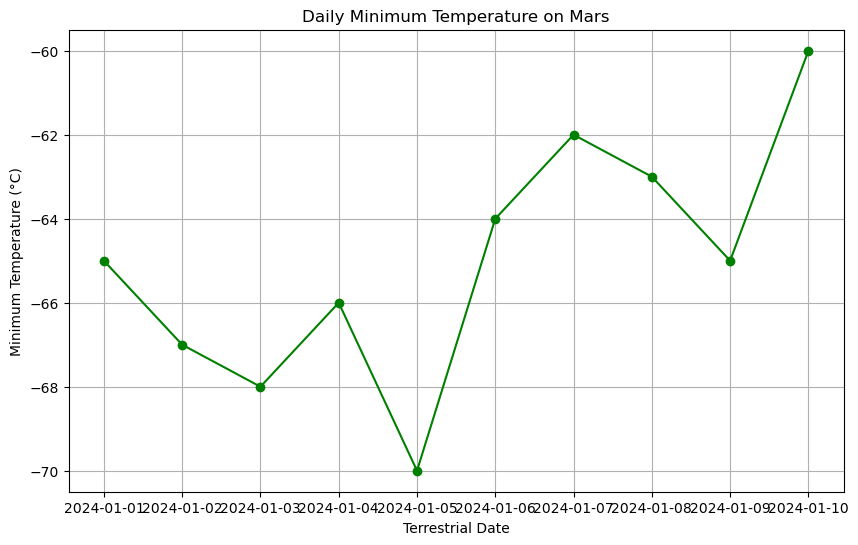

In [16]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(10,6))
plt.plot(mars_data_df['terrestrial_date'], mars_data_df['min_temp'], marker='o', linestyle='-', color='green')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.show()

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [17]:
#Write the data to a CSV
mars_data_df.to_csv('mars_weather_data.csv', index=False)

In [18]:
browser.quit()